In [ ]:
#!pip install opencv-python

In [ ]:
#pip install tqdm

In [ ]:
#!pip install h5py

In [1]:
#Import necessary libraries : 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 #library used in computer vision applications
from tqdm import tqdm #produces smart progress bar around the iterables
import pandas as pd


In [2]:
data_directory = "C://Internship Projects/Projects/Image Scraping and Classification Project/Images/"
categories = ['saree','jeans+for+men','trousers+for+women']

In [ ]:
#Image augmentation: 
for category in categories:
    path = os.path.join(data_directory,category)
    class_category = categories.index(category)
    pic_num = 500
    
    for image in tqdm(os.listdir(path)): #returns a list of all the files in the given directory
        images = cv2.imread(os.path.join(path,image)) #convert to array
        #Flip the images and save them : 
        flipped_images = cv2.flip(images,0) #horizontal direction
        cv2.imwrite(path+"/pic_"+str(pic_num)+".jpg",flipped_images)

        #rotate the images 45 and 90 deg and save them : 
        rows = images.shape[0]
        cols = images.shape[1]
        
        deg_45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
        deg_45_img = cv2.warpAffine(images,deg_45,(cols,rows))
        cv2.imwrite(path+"/pic_"+str(pic_num)+".jpg",deg_45_img)

        deg_90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
        deg_90_img = cv2.warpAffine(images,deg_90,(cols,rows))
        cv2.imwrite(path+"/pic_"+str(pic_num)+".jpg",deg_90_img)

        pic_num+=1

        
    
        

In [3]:
#read all the images from the directory and label the data:

dataset = []

for category in categories:
    path = os.path.join(data_directory,category)
    class_category = categories.index(category)
    for image in tqdm(os.listdir(path)): #returns a list of all the files in the given directory 
        try:
            img_array = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE) #convert to array
            img_array = cv2.resize(img_array,(150,320))   
            dataset.append([img_array,class_category])
        except Exception as e:
            pass
        
        
print("Length of Dataset :", len(dataset))
    
        

100%|██████████████████████████████████████████████████████████████████████████████| 1734/1734 [00:40<00:00, 43.05it/s]

Length of Dataset : 5202


In [4]:
import random

random.shuffle(dataset)

In [5]:
X = []
y = []

for features,labels in dataset:
    X.append(features)
    y.append(labels)

In [6]:
#Normalize the data: 
X = np.array(X)/255
y = np.array(y)

In [7]:
X = X.reshape(-1,320,150,1)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


tf.random.set_seed(7)
#to monitor the training process and stops the process early and avoids overfitting:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1) 


Epoch 00001: val_accuracy improved from -inf to 0.68935, saving model to classifier1.h5

Epoch 00002: val_accuracy improved from 0.68935 to 0.79824, saving model to classifier1.h5

Epoch 00003: val_accuracy improved from 0.79824 to 0.81906, saving model to classifier1.h5

Epoch 00004: val_accuracy improved from 0.81906 to 0.82946, saving model to classifier1.h5

Epoch 00005: val_accuracy did not improve from 0.82946
Epoch 00005: early stopping
Training Loss :
 [0.9125379920005798, 0.5227792263031006, 0.3819718360900879, 0.2927936315536499, 0.23422543704509735]
Testing Loss :
 [0.6460430026054382, 0.4827575385570526, 0.4351584315299988, 0.4288559854030609, 0.45769286155700684]
Training_Accuracy: 
 [0.5388049483299255, 0.7726648449897766, 0.8351648449897766, 0.8811812996864319, 0.9055631756782532]
Testing Accuracy: 
 [0.689351499080658, 0.7982385754585266, 0.8190552592277527, 0.829463541507721, 0.8150520324707031]


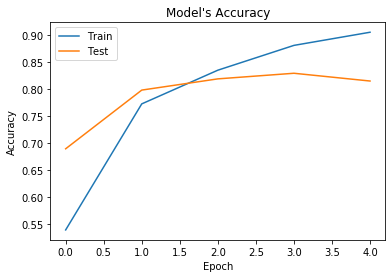

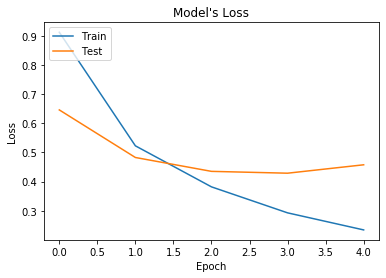

In [26]:
#Model 1 : 
classifier1 = Sequential()
classifier1.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(320,150,1)))
classifier1.add(MaxPool2D((2,2)))

classifier1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier1.add(MaxPool2D((2,2)))

classifier1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier1.add(MaxPool2D((2,2)))

classifier1.add(Flatten())

classifier1.add(Dense(64,activation='relu'))
classifier1.add(Dense(3,activation='softmax'))

classifier1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#ModelCheckpoint is  callback function to save weights : 
mc = ModelCheckpoint('classifier1.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
history1 = classifier1.fit(X_train,y_train,epochs=10,validation_split=0.3,verbose=0,callbacks=[es,mc])

#evaluate the model:
print("Training Loss :\n",history1.history['loss'])
print("Testing Loss :\n", history1.history['val_loss'])
print("Training_Accuracy: \n",history1.history['accuracy'])
print("Testing Accuracy: \n",history1.history['val_accuracy'])

#Accuracy : 
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Loss : 
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



Epoch 00001: val_accuracy improved from -inf to 0.65492, saving model to classifier2.h5

Epoch 00002: val_accuracy improved from 0.65492 to 0.75821, saving model to classifier2.h5

Epoch 00003: val_accuracy improved from 0.75821 to 0.80384, saving model to classifier2.h5

Epoch 00004: val_accuracy improved from 0.80384 to 0.82466, saving model to classifier2.h5

Epoch 00005: val_accuracy did not improve from 0.82466
Epoch 00005: early stopping
Training Loss :
 [1.4578790664672852, 0.4952031672000885, 0.3186696767807007, 0.18392646312713623, 0.10672476887702942]
Testing Loss :
 [0.73042893409729, 0.5690819025039673, 0.5073248744010925, 0.49726948142051697, 0.5895881652832031]
Training_Accuracy: 
 [0.5556318759918213, 0.7997939586639404, 0.8725961446762085, 0.9350961446762085, 0.9656593203544617]
Testing Accuracy: 
 [0.6549239158630371, 0.7582065463066101, 0.803843080997467, 0.8246597051620483, 0.8182545900344849]


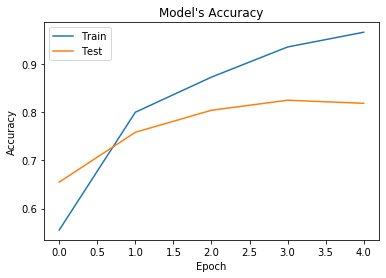

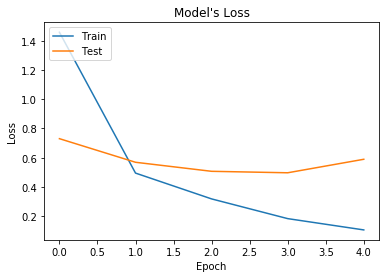

In [27]:
#Model 2 : 
classifier2 = Sequential()

classifier2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(320,150,1)))
classifier2.add(MaxPool2D((2,2)))

classifier2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier2.add(MaxPool2D((2,2)))

classifier2.add(Flatten())

classifier2.add(Dense(256,activation='relu'))
classifier2.add(Dense(3,activation='softmax'))

classifier2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mc = ModelCheckpoint('classifier2.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

history2 = classifier2.fit(X_train,y_train,epochs=10,validation_split=0.3,verbose=0,callbacks=[es,mc])

#evauluate the model:
print("Training Loss :\n",history2.history['loss'])
print("Testing Loss :\n", history2.history['val_loss'])
print("Training_Accuracy: \n",history2.history['accuracy'])
print("Testing Accuracy: \n",history2.history['val_accuracy'])

#Accuracy : 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Loss : 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 00001: val_accuracy improved from -inf to 0.74860, saving model to classifier3.h5

Epoch 00002: val_accuracy improved from 0.74860 to 0.81585, saving model to classifier3.h5

Epoch 00003: val_accuracy improved from 0.81585 to 0.82626, saving model to classifier3.h5

Epoch 00004: val_accuracy improved from 0.82626 to 0.84227, saving model to classifier3.h5

Epoch 00005: val_accuracy did not improve from 0.84227
Epoch 00005: early stopping
Training Loss :
 [0.896593451499939, 0.5049818754196167, 0.35925301909446716, 0.26660653948783875, 0.21021012961864471]
Testing Loss :
 [0.5528814792633057, 0.43304580450057983, 0.4059669077396393, 0.3971806466579437, 0.45611146092414856]
Training_Accuracy: 
 [0.5587225556373596, 0.7702609896659851, 0.8513049483299255, 0.8942307829856873, 0.9131181240081787]
Testing Accuracy: 
 [0.7485988736152649, 0.815852701663971, 0.8262609839439392, 0.8422738313674927, 0.8238590955734253]


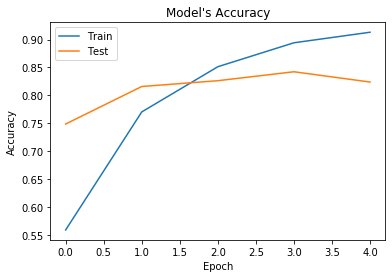

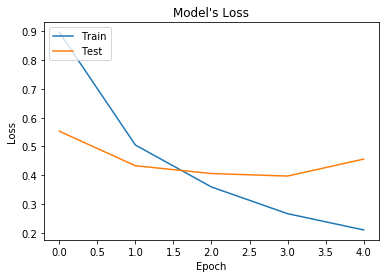

In [28]:
#Model 3 : 
classifier3 = Sequential()

classifier3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(320,150,1)))
classifier3.add(MaxPool2D((2,2)))

classifier3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier3.add(MaxPool2D((2,2)))

classifier3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier3.add(MaxPool2D((2,2)))
classifier3.add(Dropout(0.4))

classifier3.add(Flatten())

classifier3.add(Dense(128,activation='relu'))
classifier3.add(Dense(3,activation='softmax'))

classifier3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mc = ModelCheckpoint('classifier3.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

history3 = classifier3.fit(X_train,y_train,epochs=10,validation_split=0.3,verbose=0,callbacks=[es,mc])

#evauliate the model :
print("Training Loss :\n",history3.history['loss'])
print("Testing Loss :\n", history3.history['val_loss'])
print("Training_Accuracy: \n",history3.history['accuracy'])
print("Testing Accuracy: \n",history3.history['val_accuracy'])

#Accuracy : 
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Accuracy : 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 00001: val_accuracy improved from -inf to 0.75901, saving model to classifier4.h5

Epoch 00002: val_accuracy improved from 0.75901 to 0.81185, saving model to classifier4.h5

Epoch 00003: val_accuracy improved from 0.81185 to 0.83987, saving model to classifier4.h5

Epoch 00004: val_accuracy improved from 0.83987 to 0.84548, saving model to classifier4.h5

Epoch 00005: val_accuracy did not improve from 0.84548
Epoch 00005: early stopping
Training Loss :
 [0.8589583039283752, 0.48282623291015625, 0.33478230237960815, 0.2719275653362274, 0.20128756761550903]
Testing Loss :
 [0.5392736196517944, 0.44962072372436523, 0.4046662747859955, 0.39514973759651184, 0.41329509019851685]
Training_Accuracy: 
 [0.5697115659713745, 0.7953296899795532, 0.8602335453033447, 0.8894230723381042, 0.9196428656578064]
Testing Accuracy: 
 [0.7590072154998779, 0.8118494749069214, 0.839871883392334, 0.8454763889312744, 0.8286629319190979]


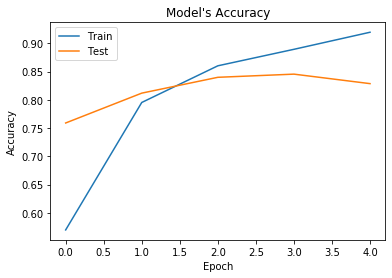

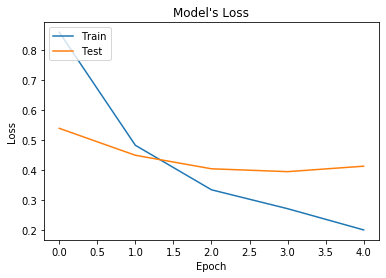

In [29]:
#Model 4  : 
classifier4 = Sequential()
classifier4.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(320,150,1)))
classifier4.add(MaxPool2D((2,2)))

classifier4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier4.add(MaxPool2D((2,2)))

classifier4.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier4.add(MaxPool2D((2,2)))
classifier4.add(Dropout(0.4))


classifier4.add(Flatten())

classifier4.add(Dense(64,activation='relu'))
classifier4.add(Dense(3,activation='softmax'))

classifier4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mc = ModelCheckpoint('classifier4.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

history4 = classifier4.fit(X_train,y_train,epochs=10,validation_split=0.3,verbose=0,callbacks=[es,mc])

#evaluate the model:
print("Training Loss :\n",history4.history['loss'])
print("Testing Loss :\n", history4.history['val_loss'])
print("Training_Accuracy: \n",history4.history['accuracy'])
print("Testing Accuracy: \n",history4.history['val_accuracy'])

#Accuracy : 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Accuracy : 
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 00001: val_accuracy improved from -inf to 0.71898, saving model to classifier5.h5

Epoch 00002: val_accuracy improved from 0.71898 to 0.81665, saving model to classifier5.h5

Epoch 00003: val_accuracy improved from 0.81665 to 0.84147, saving model to classifier5.h5

Epoch 00004: val_accuracy improved from 0.84147 to 0.84227, saving model to classifier5.h5
Epoch 00004: early stopping
Training Loss :
 [0.8115216493606567, 0.4671381413936615, 0.3385522961616516, 0.25451838970184326]
Testing Loss :
 [0.6331543922424316, 0.46445369720458984, 0.42086079716682434, 0.42511969804763794]
Training_Accuracy: 
 [0.6057692170143127, 0.807348906993866, 0.8715659379959106, 0.8997252583503723]
Testing Accuracy: 
 [0.7189751863479614, 0.816653311252594, 0.8414731621742249, 0.8422738313674927]


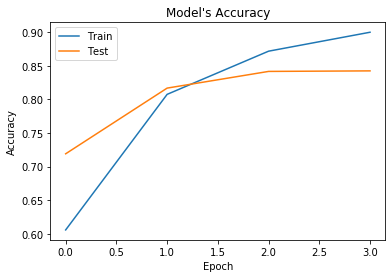

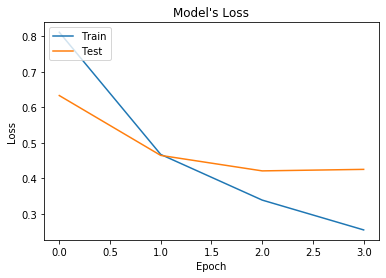

In [30]:
#Model 5 : 
classifier5 = Sequential()
classifier5.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(320,150,1)))
classifier5.add(MaxPool2D((2,2)))

classifier5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier5.add(MaxPool2D((2,2)))

classifier5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier5.add(MaxPool2D((2,2)))
classifier5.add(Dropout(0.2))


classifier5.add(Flatten())

classifier5.add(Dense(64,activation='relu'))
classifier5.add(Dense(3,activation='softmax'))

classifier5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mc = ModelCheckpoint('classifier5.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

history5 = classifier5.fit(X_train,y_train,epochs=10,validation_split=0.3,verbose=0,callbacks=[es,mc])

#evaluate the model:
print("Training Loss :\n",history5.history['loss'])
print("Testing Loss :\n", history5.history['val_loss'])
print("Training_Accuracy: \n",history5.history['accuracy'])
print("Testing Accuracy: \n",history5.history['val_accuracy'])

#Accuracy : 
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Accuracy : 
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

After comparing all the 5 models, we can observe that, **Model 4** performs the best. It gives out **accuracy of about 88.94 on training data and 84.55% on validation data**. The difference between training and validation loss is also not high. Hence we will use this as the final model.

In [31]:
#Load the saved model:
from tensorflow.keras.models import load_model

best_model = load_model('classifier4.h5')
y_predicted=best_model.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[313,   1,  14],
       [  3, 282,  67],
       [ 43,  67, 251]])>

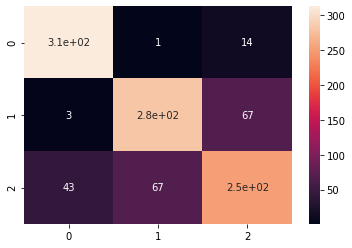

In [33]:
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
'''#serialize the model to JSON:
model_json = classifier5.to_json()

with open("model.json","w") as json_file:
    json_file.write(model_json)
    
#seriealize weights to HDF5:

classifier5.save_weights("model.h5")
print("Saved the model to the disk.") 

#load json and create model :

json_file = open("model.json",'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
#load weights into new model:
model.load_weights("model.h5")
print("Loaded the model from the disk.")'''